# 1. Προετοιμασία δεδομένων

#### 1.0 Import τα απατούμενα packages της Python

In [37]:
%load_ext autoreload
%autoreload 2

import pandas as pd

import re

import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt
from matplotlib import colormaps

import torch

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, silhouette_score, davies_bouldin_score, calinski_harabasz_score, confusion_matrix, roc_curve, auc, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.cluster import KMeans, DBSCAN, HDBSCAN, AgglomerativeClustering
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.utils import resample
from sklearn.naive_bayes import ComplementNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor

# from tqdm.notebook import tqdm

from collections import Counter

from neural_network_classifier import OscarClassificationNeuralNetwork, accuracy_fn

from plotting_functions import plot_roc_curves, plot_classification_reports_averages, plot_confusion_matrices
from classifiers import build_resampled_datasets, k_fold_fit_and_test, best_f1_score_for_each_sampling_method, k_fold_fit_and_test_knn, k_fold_fit_and_test_rf

# from google.colab import drive
# drive.mount('/content/drive')
import pickle

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 5. Μοντέλα προβλέψεων - τεχνικές αντιμετώπισης ανισόρροπων δεδομένων

https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/#h-3-smote

In [38]:
# df_un_cl.to_csv('./cleaned_dataframe_unknown.csv', index=False)
# df_cl.to_csv('./cleaned_dataframe_train.csv', index=False)

In [39]:
df_un_cl = pd.read_csv('./cleaned_dataframe_unknown.csv')
df_cl = pd.read_csv('./cleaned_dataframe_train.csv')
df_un_orig = pd.read_excel('movies_test_anon.xlsx')

In [40]:
model_results ={}

## ADA Boost

In [89]:
# df = df_cl.drop(['film','year', 'distributor','imdb_rating','imdb_vs_rt_disparity','release_date_(us)',
#                     'oscar_detail'], axis=1)

df = df_cl[['PC1', 'PC2', 'oscar_winners']]

# df = df_cl[['rotten_tomatoes_critics', 'metacritic_critics',
#        'rotten_tomatoes_audience', 'metacritic_audience',
#        'oscar_winners']]

train_datasets, test_dataset = build_resampled_datasets(df)

In [91]:
#Ada boost
model = AdaBoostClassifier(n_estimators=100, random_state=0)
results = k_fold_fit_and_test(model, train_datasets, test_dataset)
model_results['ADA'] = results

Fold 1 1-F1 score: 0.3810 for default
Fold 2 1-F1 score: 0.4000 for default
Fold 3 1-F1 score: 0.4167 for default
Fold 4 1-F1 score: 0.4348 for default
Fold 5 1-F1 score: 0.4348 for default
Fold 1 1-F1 score: 0.1887 for upsampled
Fold 2 1-F1 score: 0.1395 for upsampled
Fold 3 1-F1 score: 0.2791 for upsampled
Fold 4 1-F1 score: 0.2222 for upsampled
Fold 5 1-F1 score: 0.2400 for upsampled
Fold 1 1-F1 score: 0.4444 for downsampled
Fold 2 1-F1 score: 0.1022 for downsampled
Fold 3 1-F1 score: 0.2388 for downsampled
Fold 4 1-F1 score: 0.1739 for downsampled
Fold 5 1-F1 score: 0.3243 for downsampled
Fold 1 1-F1 score: 0.2353 for SMOTE
Fold 2 1-F1 score: 0.2456 for SMOTE
Fold 3 1-F1 score: 0.2174 for SMOTE
Fold 4 1-F1 score: 0.2800 for SMOTE
Fold 5 1-F1 score: 0.2353 for SMOTE


## Gradient Boost

In [92]:
# df = df_cl[['rotten_tomatoes_critics', 'metacritic_critics',
#        'rotten_tomatoes_audience', 'metacritic_audience',
#        'opening_weekend_($million)', 'domestic_gross_($million)',
#        'foreign_gross_($million)', 'budget_($million)', 'oscar_winners']]

train_datasets, test_dataset = build_resampled_datasets(df)

In [93]:
# Gradient boosting classifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
results = k_fold_fit_and_test(model, train_datasets, test_dataset)
model_results['GRB'] = results

Fold 1 1-F1 score: 0.0000 for default
Fold 2 1-F1 score: 0.1667 for default
Fold 3 1-F1 score: 0.3273 for default
Fold 4 1-F1 score: 0.1667 for default
Fold 5 1-F1 score: 0.5128 for default
Fold 1 1-F1 score: 0.3636 for upsampled
Fold 2 1-F1 score: 0.3673 for upsampled
Fold 3 1-F1 score: 0.3673 for upsampled
Fold 4 1-F1 score: 0.3404 for upsampled
Fold 5 1-F1 score: 0.3529 for upsampled
Fold 1 1-F1 score: 0.1538 for downsampled
Fold 2 1-F1 score: 0.2727 for downsampled
Fold 3 1-F1 score: 0.2469 for downsampled
Fold 4 1-F1 score: 0.3902 for downsampled
Fold 5 1-F1 score: 0.1185 for downsampled
Fold 1 1-F1 score: 0.3125 for SMOTE
Fold 2 1-F1 score: 0.3830 for SMOTE
Fold 3 1-F1 score: 0.3556 for SMOTE
Fold 4 1-F1 score: 0.3462 for SMOTE
Fold 5 1-F1 score: 0.3509 for SMOTE


## Decision Tree

In [94]:
# df = df_cl[['rotten_tomatoes_critics', 'metacritic_critics',
#        'rotten_tomatoes_audience', 'metacritic_audience',
#        'opening_weekend_($million)', 'domestic_gross_($million)',
#        'foreign_gross_($million)', 'budget_($million)', 'oscar_winners']]

train_datasets, test_dataset = build_resampled_datasets(df)

In [95]:
# Decision tree classifier
model = DecisionTreeClassifier(criterion='gini', splitter='best')
results = k_fold_fit_and_test(model, train_datasets, test_dataset)
model_results['DT'] = results

Fold 1 1-F1 score: 0.3571 for default
Fold 2 1-F1 score: 0.3333 for default
Fold 3 1-F1 score: 0.4800 for default
Fold 4 1-F1 score: 0.3158 for default
Fold 5 1-F1 score: 0.4348 for default


Fold 1 1-F1 score: 0.2083 for upsampled
Fold 2 1-F1 score: 0.3333 for upsampled
Fold 3 1-F1 score: 0.2553 for upsampled
Fold 4 1-F1 score: 0.2917 for upsampled
Fold 5 1-F1 score: 0.2439 for upsampled
Fold 1 1-F1 score: 0.0784 for downsampled
Fold 2 1-F1 score: 0.3214 for downsampled
Fold 3 1-F1 score: 0.1724 for downsampled
Fold 4 1-F1 score: 0.4242 for downsampled
Fold 5 1-F1 score: 0.2069 for downsampled
Fold 1 1-F1 score: 0.2222 for SMOTE
Fold 2 1-F1 score: 0.2609 for SMOTE
Fold 3 1-F1 score: 0.2500 for SMOTE
Fold 4 1-F1 score: 0.3509 for SMOTE
Fold 5 1-F1 score: 0.3182 for SMOTE


## Random Forest

In [96]:
# df = df_cl[['rotten_tomatoes_critics', 'metacritic_critics',
#        'rotten_tomatoes_audience', 'metacritic_audience',
#        'opening_weekend_($million)', 'domestic_gross_($million)',
#        'foreign_gross_($million)', 'budget_($million)', 'oscar_winners']]

train_datasets, test_dataset = build_resampled_datasets(df)

In [97]:
# Random forest
# model = RandomForestClassifier()
results = k_fold_fit_and_test_rf(train_datasets, test_dataset)
model_results['RF'] = results

Fold 1 1-F1 score: 0.6897 for default
Fold 2 1-F1 score: 0.6000 for default
Fold 3 1-F1 score: 0.5385 for default
Fold 4 1-F1 score: 0.5882 for default
Fold 5 1-F1 score: 0.2857 for default
Fold 1 1-F1 score: 0.3929 for upsampled
Fold 2 1-F1 score: 0.3929 for upsampled
Fold 3 1-F1 score: 0.3860 for upsampled
Fold 4 1-F1 score: 0.3099 for upsampled
Fold 5 1-F1 score: 0.3509 for upsampled
Fold 1 1-F1 score: 0.1719 for downsampled
Fold 2 1-F1 score: 0.2418 for downsampled
Fold 3 1-F1 score: 0.1667 for downsampled
Fold 4 1-F1 score: 0.2105 for downsampled
Fold 5 1-F1 score: 0.1880 for downsampled
Fold 1 1-F1 score: 0.3667 for SMOTE
Fold 2 1-F1 score: 0.3667 for SMOTE
Fold 3 1-F1 score: 0.4074 for SMOTE
Fold 4 1-F1 score: 0.3929 for SMOTE
Fold 5 1-F1 score: 0.3333 for SMOTE


## K-Nearest Neighbors

In [98]:
# df = df_cl[['rotten_tomatoes_critics', 'metacritic_critics',
#        'rotten_tomatoes_audience', 'metacritic_audience',
#        'oscar_winners']]

# df = df_cl[['PC1', 'PC2', 'oscar_winners']]

# df = df_cl[['rotten_tomatoes_critics', 'metacritic_critics',
#        'rotten_tomatoes_audience', 'metacritic_audience', 'domestic_gross_($million)',
#        'foreign_gross_($million)', 'oscar_winners']]

train_datasets, test_dataset = build_resampled_datasets(df)

In [99]:
#KNN
results = k_fold_fit_and_test_knn(train_datasets, test_dataset)
model_results['KNN'] = results

Fold 1 1-F1 score: 0.2667 for default
Fold 2 1-F1 score: 0.0000 for default
Fold 3 1-F1 score: 0.1429 for default
Fold 4 1-F1 score: 0.2857 for default
Fold 5 1-F1 score: 0.0000 for default
Fold 1 1-F1 score: 0.3077 for upsampled
Fold 2 1-F1 score: 0.2222 for upsampled
Fold 3 1-F1 score: 0.2353 for upsampled
Fold 4 1-F1 score: 0.3125 for upsampled
Fold 5 1-F1 score: 0.1935 for upsampled
Fold 1 1-F1 score: 0.1467 for downsampled
Fold 2 1-F1 score: 0.1517 for downsampled
Fold 3 1-F1 score: 0.1375 for downsampled
Fold 4 1-F1 score: 0.1818 for downsampled
Fold 5 1-F1 score: 0.1429 for downsampled
Fold 1 1-F1 score: 0.3182 for SMOTE
Fold 2 1-F1 score: 0.2609 for SMOTE
Fold 3 1-F1 score: 0.2927 for SMOTE
Fold 4 1-F1 score: 0.3784 for SMOTE
Fold 5 1-F1 score: 0.2941 for SMOTE


## Plot results

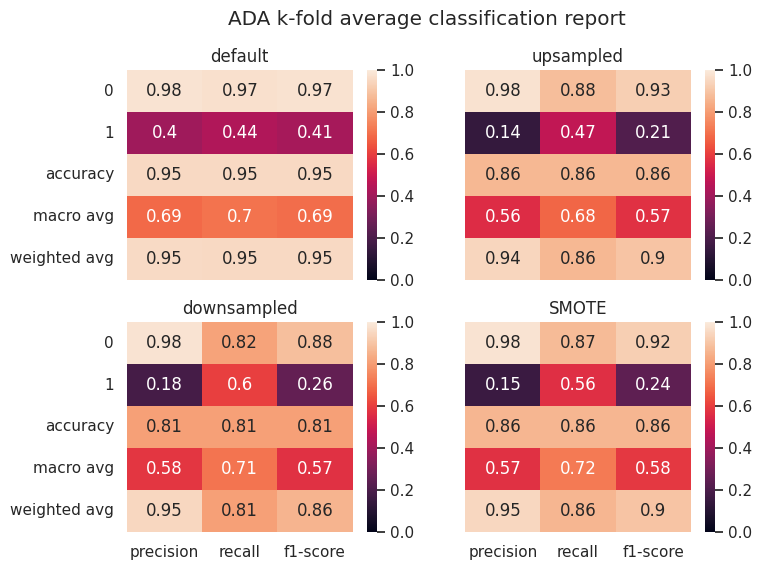

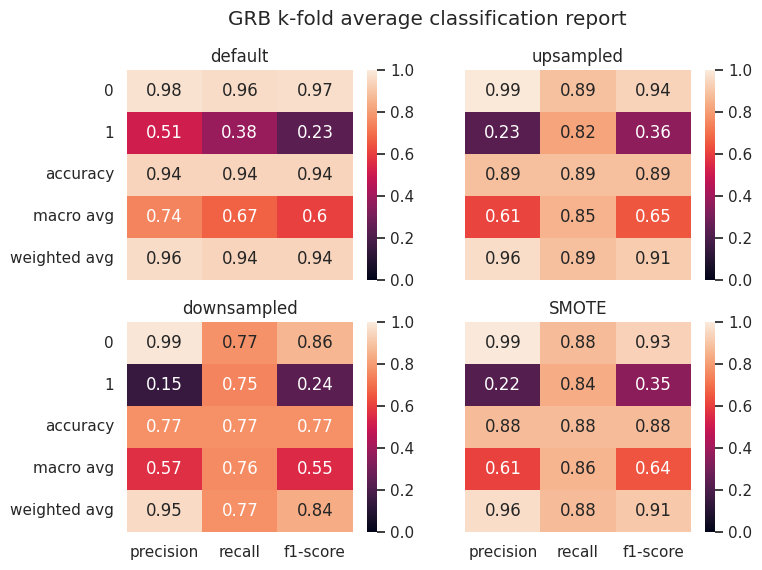

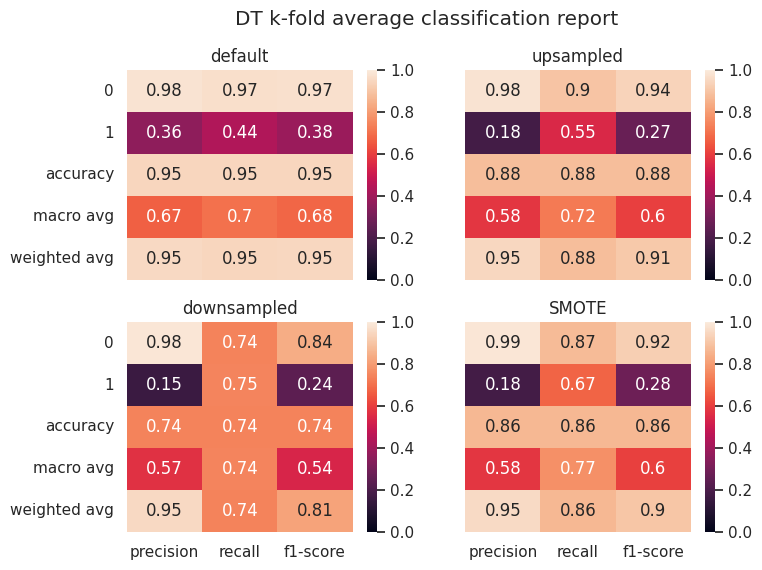

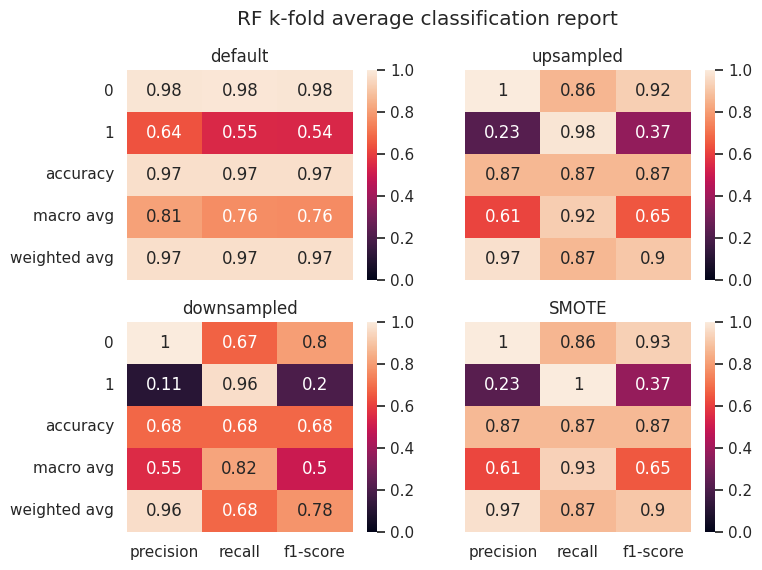

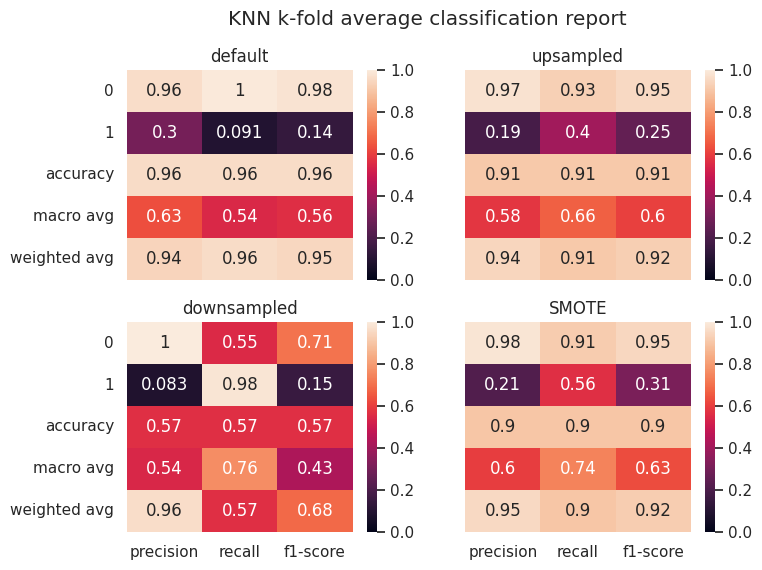

In [100]:
plot_classification_reports_averages(model_results, 'ADA')
plot_classification_reports_averages(model_results, 'GRB')
plot_classification_reports_averages(model_results, 'DT')
plot_classification_reports_averages(model_results, 'RF')
plot_classification_reports_averages(model_results, 'KNN')

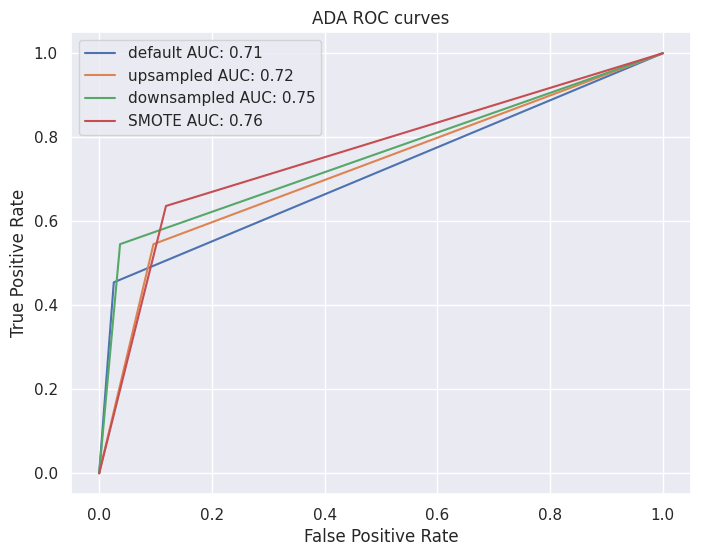

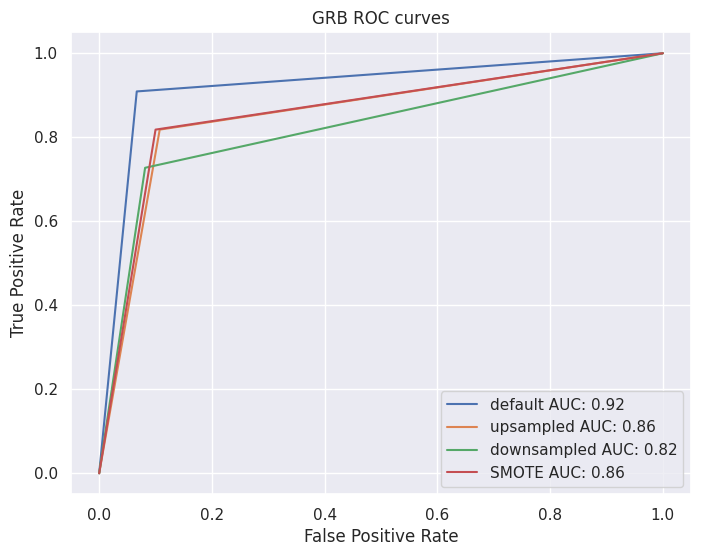

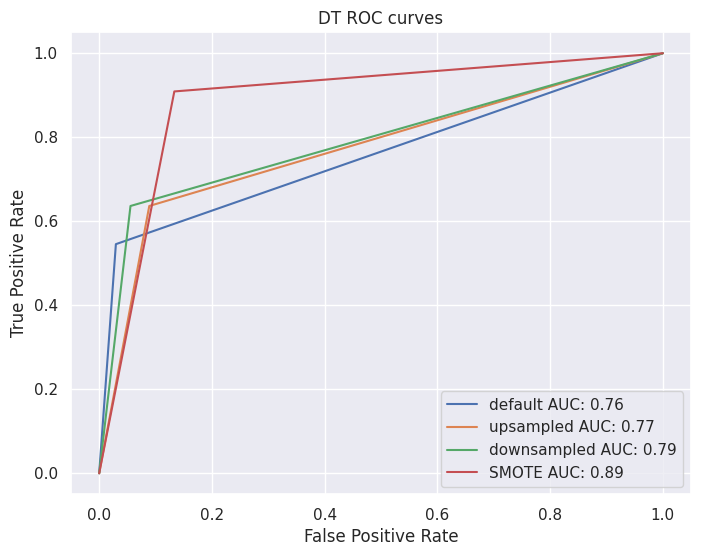

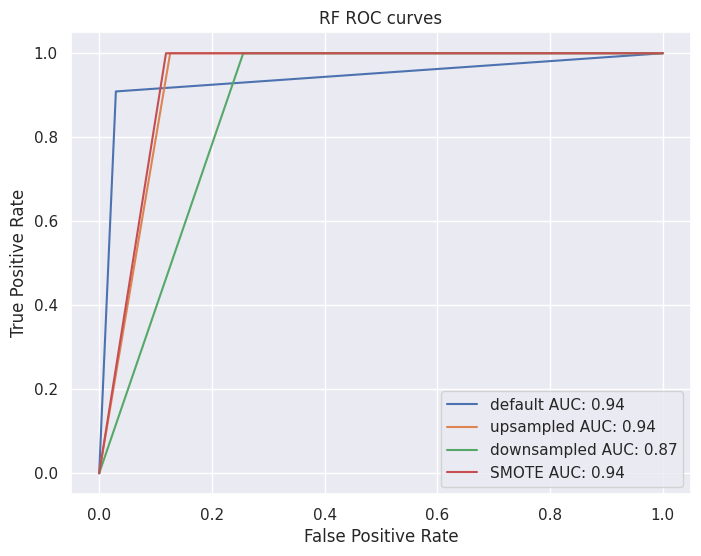

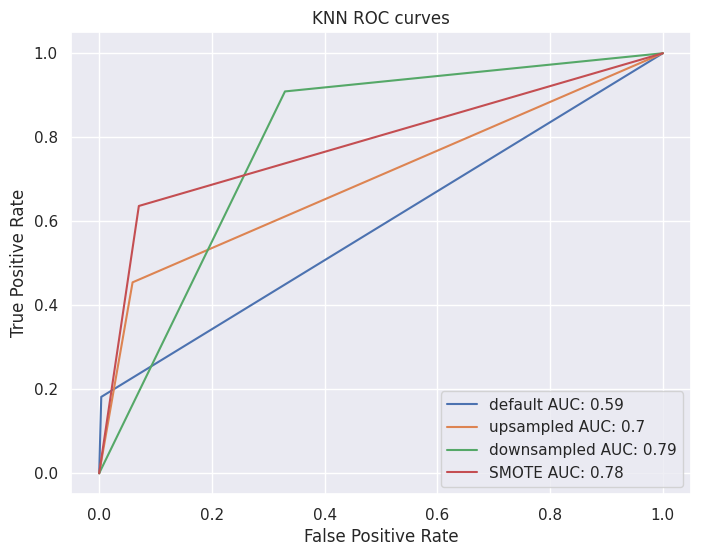

In [101]:
best_f1_ada = best_f1_score_for_each_sampling_method(model_results, 'ADA')
plot_roc_curves(best_f1_ada, 'ADA')
best_f1_grb = best_f1_score_for_each_sampling_method(model_results, 'GRB')
plot_roc_curves(best_f1_grb, 'GRB')
best_f1_dt = best_f1_score_for_each_sampling_method(model_results, 'DT')
plot_roc_curves(best_f1_dt, 'DT')
best_f1_rf = best_f1_score_for_each_sampling_method(model_results, 'RF')
plot_roc_curves(best_f1_rf, 'RF')
best_f1_knn = best_f1_score_for_each_sampling_method(model_results, 'KNN')
plot_roc_curves(best_f1_knn, 'KNN')

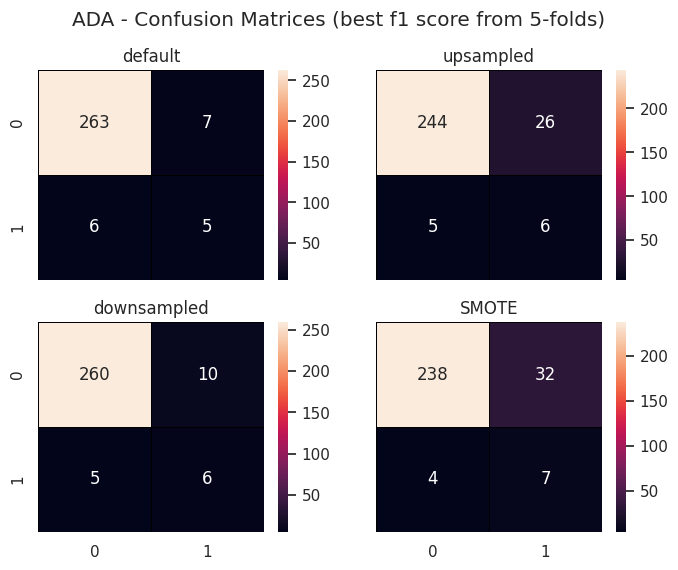

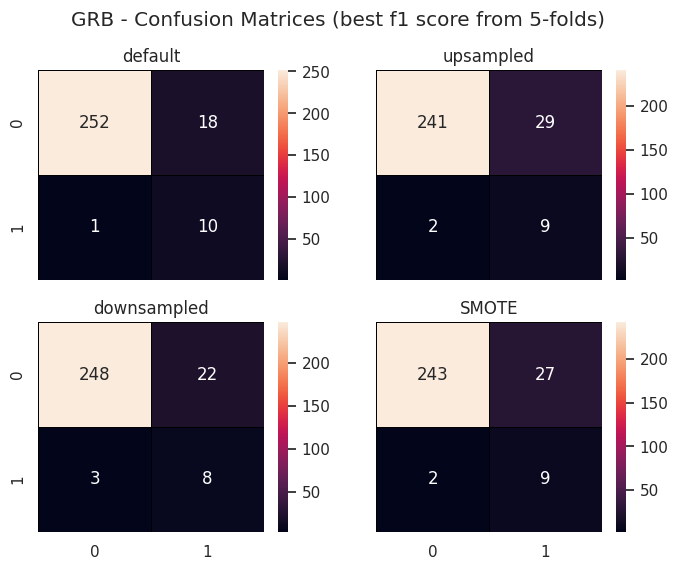

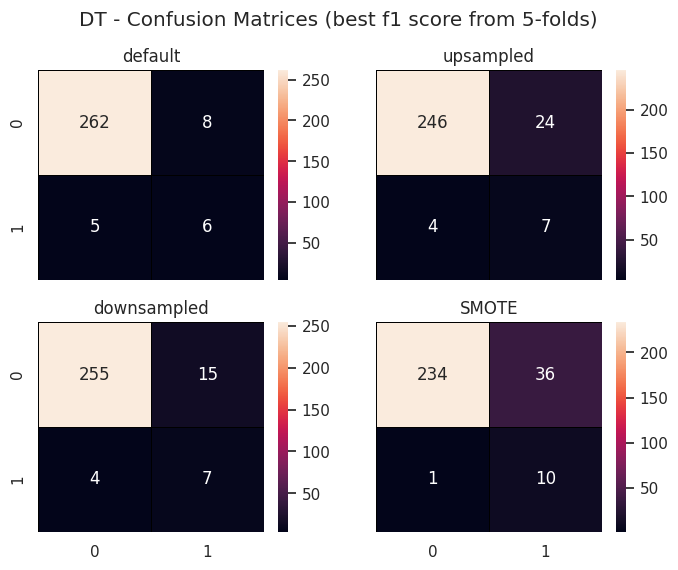

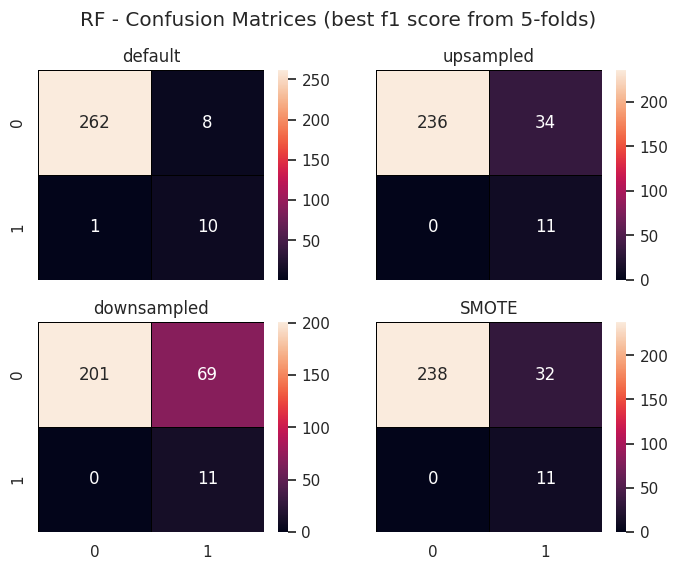

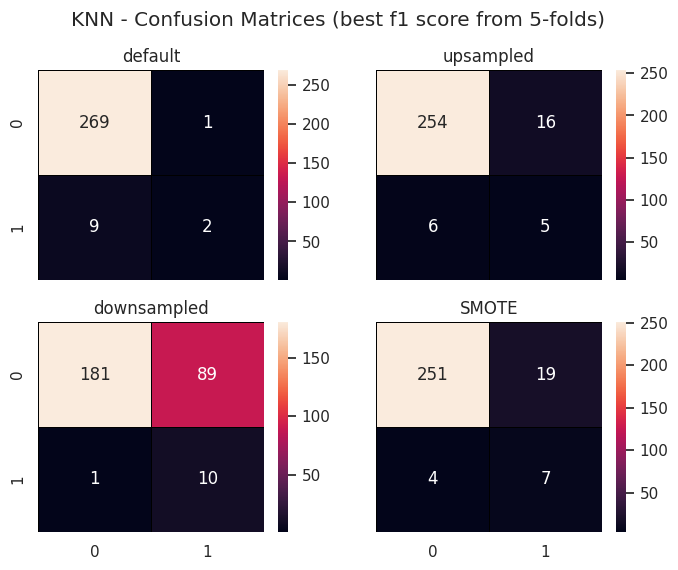

In [102]:
plot_confusion_matrices(best_f1_ada, 'ADA')
plot_confusion_matrices(best_f1_grb, 'GRB')
plot_confusion_matrices(best_f1_dt, 'DT')
plot_confusion_matrices(best_f1_rf, 'RF')
plot_confusion_matrices(best_f1_knn, 'KNN')